In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import clear_output

import joblib
import math

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import requests

In [2]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df_North = pd.read_csv('/content/gdrive/My Drive/pacman_CS_179/my_data_North.csv')
df_South = pd.read_csv('/content/gdrive/My Drive/pacman_CS_179/my_data_South.csv')

In [4]:
df_North.shape

(147735, 1616)

In [5]:
df_South.shape

(147739, 1616)

In [6]:
features_North = df_North[df_North.columns[:-1]].to_numpy()
features_South = df_South[df_South.columns[:-1]].to_numpy()

In [7]:
labels_North = df_North[df_North.columns[-1]].to_numpy()
labels_South = df_South[df_South.columns[-1]].to_numpy()

In [8]:
features_North.shape

(147735, 1615)

In [9]:
labels_North.shape

(147735,)

In [10]:
features_South.shape

(147739, 1615)

In [11]:
labels_South.shape

(147739,)

In [12]:
features = [features_North, features_South]
labels = [labels_North, labels_South]
file_model_names = ['/content/gdrive/My Drive/pacman_CS_179/model_North', 
                    '/content/gdrive/My Drive/pacman_CS_179/model_South']
file_scaler_names = ['/content/gdrive/My Drive/pacman_CS_179/scaler_North.sav', 
                     '/content/gdrive/My Drive/pacman_CS_179/scaler_South.sav']

In [18]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

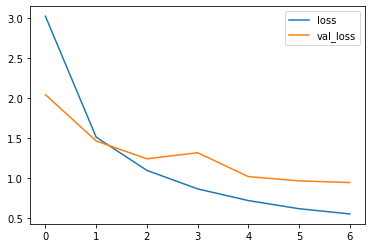

In [ ]:
for i in range(2):    
    #X_train, X_test, y_train, y_test = train_test_split(features[i], labels[i], test_size=0.30)
    X_train = features[i]
    y_train = labels[i]
    
    scaler = StandardScaler()
    
    # Fit only to the training data
    scaler.fit(X_train)

    # Now apply the transformations to the data:
    X_train = scaler.transform(X_train)
    #X_test = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(1200, input_dim=1615, activation='sigmoid', kernel_initializer='he_uniform'))
    model.add(Dense(700, activation='sigmoid'))
    model.add(Dense(200, activation='sigmoid'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, validation_split=0.3, 
                        epochs=100, batch_size=300, verbose=0,
                        callbacks = [plot_losses])

    # plt.plot(history.history['accuracy'])
    # plt.plot(history.history['val_accuracy'])
    # plt.title('model accuracy')
    # plt.ylabel('accuracy')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    # plt.show()
    
    model.save(file_model_names[i])
    joblib.dump(scaler, file_scaler_names[i])

In [ ]:
start_time = time.time()
for i in range(1000):
  r = create_1(20, 30)
print(time.time() - start_time)
start_time = time.time()
for i in range(1000):
  r = create_2(20, 30)
print(time.time() - start_time)


0.0659644603729248
0.041500091552734375


In [ ]:
aa = np.random.randint(9, size=5)
aa

array([5, 3, 5, 1, 4])

In [ ]:
np.concatenate((aa, [9]))

array([5, 3, 5, 1, 4, 9])

In [ ]:
aaa = np.empty([0, 3])
aaa

array([], shape=(0, 3), dtype=float64)

In [ ]:
aaa = np.vstack((aaa, [1, 2, 4]))
aaa

array([[1., 2., 4.]])

In [ ]:
aaa = np.vstack((aaa, [4, 5, 0]))
aaa

array([[1., 2., 4.],
       [4., 5., 0.]])

In [ ]:
bb = np.random.randint(9, size=5)
bb

array([0, 3, 3, 8, 8])

In [ ]:
cc = np.random.randint(9, size=5)
cc

array([8, 4, 3, 5, 3])

In [ ]:
np.concatenate((aa, bb, cc))

array([5, 2, 0, 0, 7, 0, 3, 3, 8, 8, 8, 4, 3, 5, 3])

In [ ]:
np.zeros([3, 5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
import math

In [ ]:
math.log(41)

3.713572066704308

In [ ]:
aaa = np.random.randint(11, size=(3, 3))
aaa

array([[10,  7,  7],
       [ 2,  4,  8],
       [ 8,  3,  2]])

In [ ]:
my_list = []
for row in aaa:
  m = np.mean(row)
  sd = np.sqrt(np.sum((row - m) ** 2) / (row.size - 1))
  my_list.append((row - m) / sd)
np.asarray(my_list)



array([[ 1.15470054, -0.57735027, -0.57735027],
       [-0.87287156, -0.21821789,  1.09108945],
       [ 1.14064686, -0.41478068, -0.72586619]])

In [ ]:
from scipy import stats
stats.zscore(aaa, axis = 1)

array([[ 1.41421356, -0.70710678, -0.70710678],
       [-1.06904497, -0.26726124,  1.33630621],
       [ 1.3970014 , -0.50800051, -0.88900089]])

In [ ]:
np.

In [ ]:
log(1)

NameError: ignored

In [ ]:
a = [[1, 3], [3, 4]]
b = functools.reduce(operator.iconcat, a, [])
b

[1, 3, 3, 4]

In [ ]:
zeros = [0] * 5
def foo(aaa):
  aaa[2] = 6
foo(zeros)
zeros

[0, 0, 6, 0, 0]

In [ ]:
(x, y) = (4, 6)
x += 1
x

5

In [ ]:
print('hi ', x)

hi  5
